In [ ]:
import pandas as pd
df=pd.read_csv('/content/billionaire_data.csv')

In [ ]:
df.head()

,Rank,Name,Total Net Worth,Last Change,YTD Change,Country/Region,Industry
0,1,Elon Musk,$256B,-$2.50B,+$27.3B,United States,Technology
1,2,Mark Zuckerberg,$209B,-$795M,+$80.8B,United States,Technology
2,3,Jeff Bezos,$208B,+$2.32B,+$31.2B,United States,Technology
3,4,Bernard Arnault,$191B,-$384M,-$16.9B,France,Consumer
4,5,Larry Ellison,$188B,+$3.24B,+$65.6B,United States,Technology


In [ ]:
df.head(100)

,Rank,Name,Total Net Worth,Last Change,YTD Change,Country/Region,Industry
0,1,Elon Musk,$256B,-$2.50B,+$27.3B,United States,Technology
1,2,Mark Zuckerberg,$209B,-$795M,+$80.8B,United States,Technology
2,3,Jeff Bezos,$208B,+$2.32B,+$31.2B,United States,Technology
3,4,Bernard Arnault,$191B,-$384M,-$16.9B,France,Consumer
4,5,Larry Ellison,$188B,+$3.24B,+$65.6B,United States,Technology
...,...,...,...,...,...,...,...
95,96,Cyrus Poonawalla,$20.8B,+$92.4M,+$3.18B,India,Health Care
96,97,Vicky Safra,$20.8B,+$121M,+$627M,Greece,Finance
97,98,Lei Jun,$20.8B,-$293M,+$6.38B,China,Technology
98,99,Stan Kroenke,$20.7B,$0,+$3.15B,United States,Real Estate


In [ ]:
import seaborn as sns


Summary Statistics: Present the summary statistics for the total net worth of billionaires in the dataset.

  

In [ ]:
df['Total Net Worth'] = df['Total Net Worth'].replace({'\$': '', 'B': ''}, regex=True).astype(float)

# Compute summary statistics
summary_statistics = df['Total Net Worth'].describe()

# Display summary statistics
print("Summary Statistics for Total Net Worth:")
print(summary_statistics)

Summary Statistics for Total Net Worth:
count    500.000000
mean      19.149820
std       28.337636
min        6.330000
25%        7.810000
50%       10.600000
75%       16.525000
max      256.000000
Name: Total Net Worth, dtype: float64


T**op Indian Billionaires**: Create a plot showing the ten individuals from India with the highest total net worth.


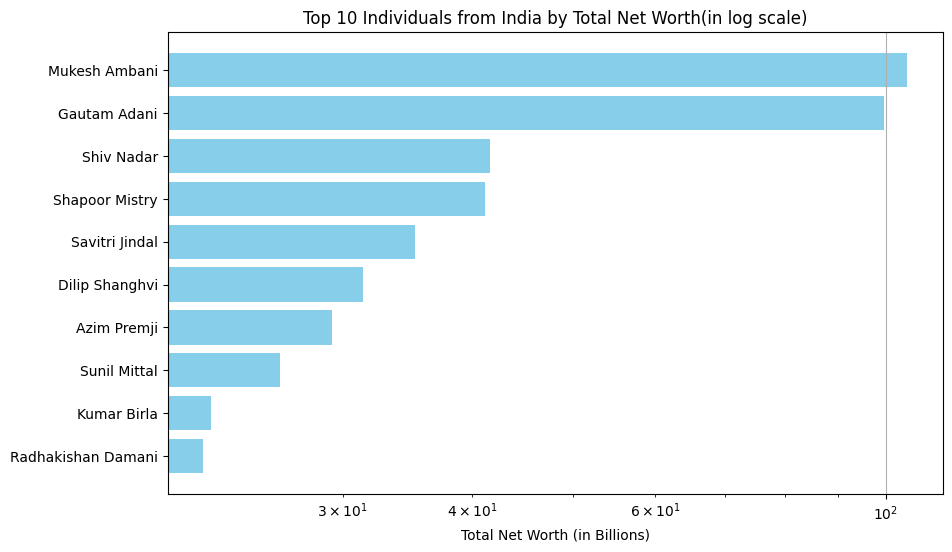

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded
df['Total Net Worth'] = df['Total Net Worth'].replace({'\$': '', 'B': ''}, regex=True).astype(float)

# Filter for Indian individuals, sort by 'Total Net Worth' in descending order, and select the top 10
top_individuals = df[df['Country/Region'] == 'India'].sort_values(by='Total Net Worth', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_individuals['Name'], top_individuals['Total Net Worth'], color='skyblue')
plt.xlabel('Total Net Worth (in Billions)')
plt.title('Top 10 Individuals from India by Total Net Worth(in log scale)')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.grid(axis='x')  # Add grid lines for better readability
plt.show()


**Country Representation:** Among the top five countries, identify which country has the highest representation in the billionaire index.

Country/Region
United States    186
China             53
India             25
Germany           19
Japan              5
Name: count, dtype: int64


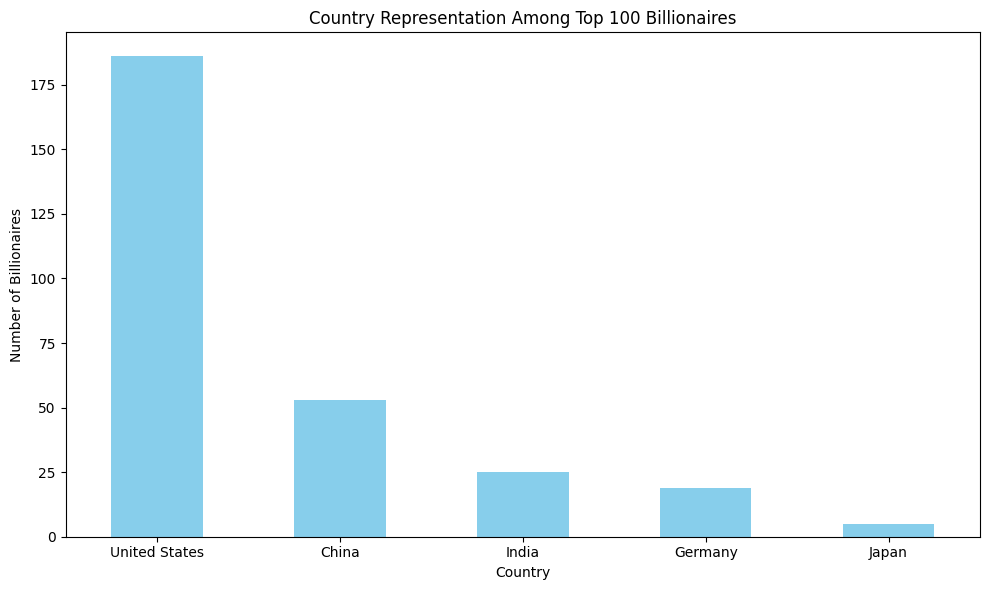

In [ ]:
country_counts = df['Country/Region'].value_counts()

# Get the top five countries by GDP (for example purposes)
# Update this list based on actual GDP data or common representations
top_gdp_countries = ['United States', 'China', 'Japan', 'Germany', 'India']

# Filter the counts to include only the top GDP countries
country_counts_filtered = country_counts[country_counts.index.isin(top_gdp_countries)]

# Check if USA is present in the filtered counts
print(country_counts_filtered)

# Plotting only if there's data to plot
if not country_counts_filtered.empty:
    plt.figure(figsize=(10, 6))
    country_counts_filtered.plot(kind='bar', color='skyblue')
    plt.title('Country Representation Among Top 100 Billionaires')
    plt.xlabel('Country')
    plt.ylabel('Number of Billionaires')
    plt.xticks(rotation=0)


    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("No data to display for the specified countries.")

**Industry Representation:** Generate a plot illustrating the five industries with the most billionaires represented in the billionaire index.

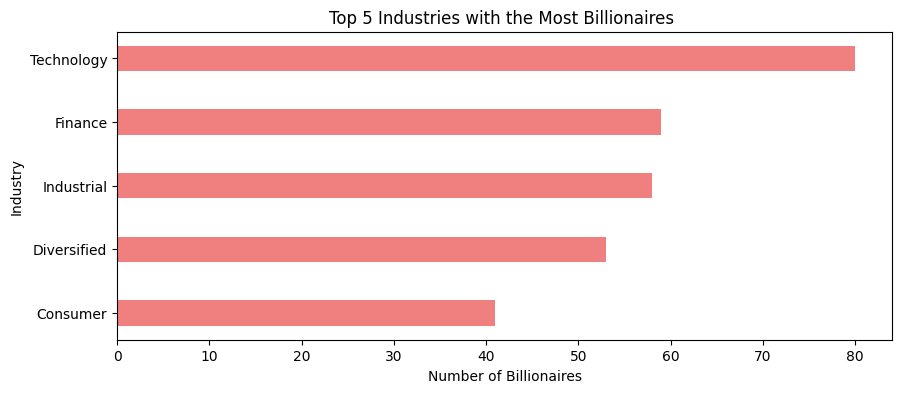

In [ ]:

# Count the number of billionaires in each industry
industry_counts = df['Industry'].value_counts()

# Select the top 5 industries and sort in ascending order
top_industries = industry_counts.head(5).sort_values(ascending=True)

# Plotting with adjusted figure size and bar width
plt.figure(figsize=(10, 4))  # Smaller figure size
plt.barh(top_industries.index, top_industries.values, color='lightcoral', height=0.4)  # Adjusting bar height
plt.ylabel('Industry')
plt.xlabel('Number of Billionaires')
plt.title('Top 5 Industries with the Most Billionaires ')
# plt.xlim(0, top_industries.values.max() + 1)  # Set x-axis limit for better spacing
plt.show()

In [ ]:
unique_countries = df['Country/Region'].unique()
print(unique_countries)

['United States' 'France' 'Spain' 'India' 'Mexico' 'China' 'Japan'
 'Germany' 'Italy' 'Hong Kong' 'Russian Federation' 'Brazil' 'Chile'
 'Canada' 'Switzerland' 'Monaco' 'Indonesia' 'Australia' 'Greece'
 'Philippines' 'Israel' 'United Kingdom' 'Austria' 'Sweden' 'Malaysia'
 'Saudi Arabia' 'Singapore' 'Thailand' 'Colombia' 'Netherlands'
 'Czech Republic' 'South Africa' 'Cyprus' 'Taiwan' 'Nigeria' 'New Zealand'
 'Liechtenstein' 'Korea, Republic of' 'Egypt' 'Ireland'
 'United Arab Emirates' 'Argentina' 'Cayman Islands' 'Norway' 'Denmark'
 'Kazakhstan' 'Georgia' 'Isle of Man' 'Turkey']


**Continent Mapping: **Add a new column labeled "Continent" to the dataset, mapping each country to its corresponding continent (Exclude Antarctica). Calculate the total net worth for each continent and visualize the importance of each continent in the billionaire index.


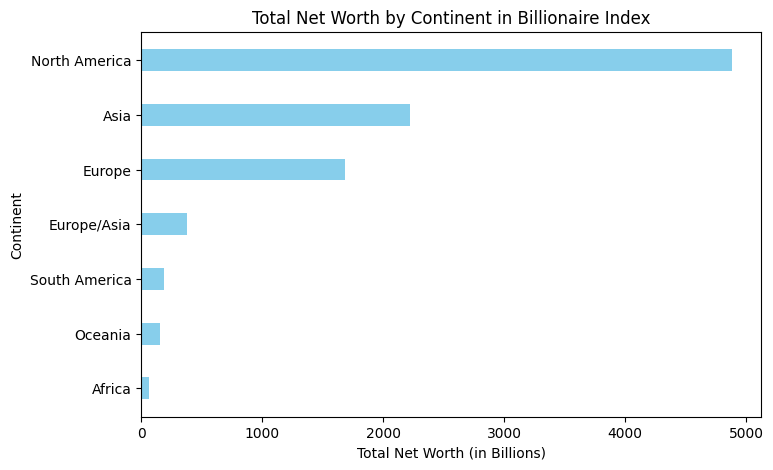

In [ ]:
country_to_continent = {
    'United States': 'North America',
    'France': 'Europe',
    'Spain': 'Europe',
    'India': 'Asia',
    'Mexico': 'North America',
    'China': 'Asia',
    'Japan': 'Asia',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'Hong Kong': 'Asia',
    'Russian Federation': 'Europe/Asia',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Canada': 'North America',
    'Switzerland': 'Europe',
    'Monaco': 'Europe',
    'Indonesia': 'Asia',
    'Australia': 'Oceania',
    'Greece': 'Europe',
    'Philippines': 'Asia',
    'Israel': 'Asia',
    'United Kingdom': 'Europe',
    'Austria': 'Europe',
    'Sweden': 'Europe',
    'Malaysia': 'Asia',
    'Saudi Arabia': 'Asia',
    'Singapore': 'Asia',
    'Thailand': 'Asia',
    'Colombia': 'South America',
    'Netherlands': 'Europe',
    'Czech Republic': 'Europe',
    'South Africa': 'Africa',
    'Cyprus': 'Europe/Asia',
    'Taiwan': 'Asia',
    'Nigeria': 'Africa',
    'New Zealand': 'Oceania',
    'Liechtenstein': 'Europe',
    'Korea, Republic of': 'Asia',
    'Egypt': 'Africa',
    'Ireland': 'Europe',
    'United Arab Emirates': 'Asia',
    'Argentina': 'South America',
    'Cayman Islands': 'North America',
    'Norway': 'Europe',
    'Denmark': 'Europe',
    'Kazakhstan': 'Asia',
    'Georgia': 'Europe/Asia',
    'Isle of Man': 'Europe',
    'Turkey': 'Europe/Asia'
}

# Step 2: Add the continent column to the DataFrame
df['Continent'] = df['Country/Region'].map(country_to_continent)

# Step 3: Calculate total net worth by continent
continent_net_worth = df.groupby('Continent')['Total Net Worth'].sum().sort_values(ascending=True)

# Step 4: Visualize the results with swapped axes in ascending order
plt.figure(figsize=(8, 5))  # Adjusting the figure size
plt.barh(continent_net_worth.index, continent_net_worth.values, color='skyblue', height=0.4)  # Use barh for horizontal bars
# plt.xscale('log')
plt.xlabel('Total Net Worth (in Billions)')
plt.ylabel('Continent')
plt.title('Total Net Worth by Continent in Billionaire Index')
plt.show()